# 1. Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!pip install unidecode
!pip install contractions

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, Dense, Dropout, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from string import punctuation
from unidecode import unidecode
from nltk.util import ngrams
from contractions import fix
import nltk

# 2. Load Dataset (Train)

In [ ]:
df = pd.read_excel("Marge.xlsx")
df.head()

,Text,Environmental Negative,Environmental Neutral,Environmental Positive,Governance Negative,Governance Neutral,Governance Positive,Social Negative,Social Neutral,Social Positive,__index_level_0__
0,"Also, its U.S.-based plants have voluntarily p...",0,0,1,0,0,1,0,0,1,174
1,Investors are concerned that Chevron has not a...,1,0,0,1,0,0,0,0,0,460
2,The Board should summarize its findings to sha...,0,0,0,0,1,0,0,0,0,356
3,These Committees regularly assess risks and op...,0,0,0,0,0,1,0,0,0,80
4,"Historically, releases from CPChem’s petrochem...",1,0,0,1,0,0,0,0,0,154


# 3. Load dataset (Test)

# 3. Data Preprocessing Train

In [ ]:
# Fungsi untuk mengisi kolom baru berdasarkan nilai di kolom lain
def map_sentiment1(row):
    if row["Environmental Negative"] == 1:
        return "Negatif"
    elif row["Environmental Neutral"] == 1:
        return "Netral"
    elif row["Environmental Positive"] == 1:
        return "Positif"
    else:
        return "Netral"

def map_sentiment2(row):
    if row["Governance Negative"] == 1:
        return "Negatif"
    elif row["Governance Neutral"] == 1:
        return "Netral"
    elif row["Governance Positive"] == 1:
        return "Positif"
    else:
        return "Netral"

def map_sentiment3(row):
    if row["Social Negative"] == 1:
        return "Negatif"
    elif row["Social Neutral"] == 1:
        return "Netral"
    elif row["Social Positive"] == 1:
        return "Positif"
    else:
        return "Netral"

# Menambahkan kolom baru "Sentimen_Environmental"
df["Sentimen_Environmental"] = df.apply(map_sentiment1, axis=1)
df["Sentimen_Governance"] = df.apply(map_sentiment2, axis=1)
df["Sentimen_Social"] = df.apply(map_sentiment3, axis=1)

print(df)


                                                  Text  \
0    Also, its U.S.-based plants have voluntarily p...   
1    Investors are concerned that Chevron has not a...   
2    The Board should summarize its findings to sha...   
3    These Committees regularly assess risks and op...   
4    Historically, releases from CPChem’s petrochem...   
..                                                 ...   
674  This policy would phase in for the next CEO tr...   
675  The policies of the energy industry are crucia...   
676  In addition, inadequate board attention could ...   
677  Your Board recommends a vote AGAINST this prop...   
678  Chevron advocates on behalf of its employees a...   

     Environmental Negative  Environmental Neutral  Environmental Positive  \
0                         0                      0                       1   
1                         1                      0                       0   
2                         0                      0                   

In [ ]:
df.head()

,Text,Environmental Negative,Environmental Neutral,Environmental Positive,Governance Negative,Governance Neutral,Governance Positive,Social Negative,Social Neutral,Social Positive,__index_level_0__,Sentimen_Environmental,Sentimen_Governance,Sentimen_Social
0,"Also, its U.S.-based plants have voluntarily p...",0,0,1,0,0,1,0,0,1,174,Positif,Positif,Positif
1,Investors are concerned that Chevron has not a...,1,0,0,1,0,0,0,0,0,460,Negatif,Negatif,Netral
2,The Board should summarize its findings to sha...,0,0,0,0,1,0,0,0,0,356,Netral,Netral,Netral
3,These Committees regularly assess risks and op...,0,0,0,0,0,1,0,0,0,80,Netral,Positif,Netral
4,"Historically, releases from CPChem’s petrochem...",1,0,0,1,0,0,0,0,0,154,Negatif,Negatif,Netral


In [ ]:
def most_common(lst):
    return max(set(lst), key=lst.count)

# Menggabungkan kolom Sentimen_Environmental, Sentimen_Governance, dan Sentimen_Social
df['Combined_Sentiments'] = df.apply(lambda row: [row['Sentimen_Environmental'], row['Sentimen_Governance'], row['Sentimen_Social']], axis=1)

# Mendapatkan nilai yang paling sering muncul dari kombinasi sentimen
df['Modus_sentimen'] = df['Combined_Sentiments'].apply(lambda x: most_common(x))

# Menghapus kolom Combined_Sentiments jika tidak diperlukan lagi
df.drop(columns=['Combined_Sentiments'], inplace=True)

# Menampilkan data frame hasil
print(df)

                                                  Text  \
0    Also, its U.S.-based plants have voluntarily p...   
1    Investors are concerned that Chevron has not a...   
2    The Board should summarize its findings to sha...   
3    These Committees regularly assess risks and op...   
4    Historically, releases from CPChem’s petrochem...   
..                                                 ...   
674  This policy would phase in for the next CEO tr...   
675  The policies of the energy industry are crucia...   
676  In addition, inadequate board attention could ...   
677  Your Board recommends a vote AGAINST this prop...   
678  Chevron advocates on behalf of its employees a...   

     Environmental Negative  Environmental Neutral  Environmental Positive  \
0                         0                      0                       1   
1                         1                      0                       0   
2                         0                      0                   

In [ ]:
# Fungsi untuk menggabungkan nilai dari kolom Sentimen_Environmental, Sentimen_Governance, dan Sentimen_Social
def summarize_sentimen(row):
    sentiments = {'Sentimen_Environmental': row['Sentimen_Environmental'],
                  'Sentimen_Governance': row['Sentimen_Governance'],
                  'Sentimen_Social': row['Sentimen_Social']}

    summarized_sentiment = [f"{k}: {v}" for k, v in sentiments.items() if v != 'Tidak dikenal']
    return ','.join(summarized_sentiment) if summarized_sentiment else 'Tidak dikenal'

# Membuat kolom Summarize_Sentimen
df['Summarize_Sentimen'] = df.apply(summarize_sentimen, axis=1)

# Menampilkan data frame hasil
print(df)


                                                  Text  \
0    Also, its U.S.-based plants have voluntarily p...   
1    Investors are concerned that Chevron has not a...   
2    The Board should summarize its findings to sha...   
3    These Committees regularly assess risks and op...   
4    Historically, releases from CPChem’s petrochem...   
..                                                 ...   
674  This policy would phase in for the next CEO tr...   
675  The policies of the energy industry are crucia...   
676  In addition, inadequate board attention could ...   
677  Your Board recommends a vote AGAINST this prop...   
678  Chevron advocates on behalf of its employees a...   

     Environmental Negative  Environmental Neutral  Environmental Positive  \
0                         0                      0                       1   
1                         1                      0                       0   
2                         0                      0                   

In [ ]:
print(df.to_string())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Text  Environmental Negative  Environmental Neutral  Environmental Positive  Governance Negative  Governance Neutral  Governance Positive  Social Negative  Social Neutral  Social Positive  __index_level_0__ Sentimen_Environmental Sentimen_Governance Sentimen_Social Modus_sentimen                                                                     Summarize_Sentimen
0                                                         

In [ ]:
# Fungsi untuk mengonversi nilai dalam kolom Summarize_sentimen menjadi label numerik
def convert_to_label(sentiment):
    if sentiment == 'Negatif':
        return -1
    elif sentiment == 'Netral':
        return 0
    elif sentiment == 'Positif':
        return 1
    else:
        return 3

# Membuat kolom Label
df['Label'] = df['Modus_sentimen'].apply(convert_to_label)

# Menampilkan data frame hasil
print(df)

                                                  Text  \
0    Also, its U.S.-based plants have voluntarily p...   
1    Investors are concerned that Chevron has not a...   
2    The Board should summarize its findings to sha...   
3    These Committees regularly assess risks and op...   
4    Historically, releases from CPChem’s petrochem...   
..                                                 ...   
674  This policy would phase in for the next CEO tr...   
675  The policies of the energy industry are crucia...   
676  In addition, inadequate board attention could ...   
677  Your Board recommends a vote AGAINST this prop...   
678  Chevron advocates on behalf of its employees a...   

     Environmental Negative  Environmental Neutral  Environmental Positive  \
0                         0                      0                       1   
1                         1                      0                       0   
2                         0                      0                   

In [ ]:
df.head()

,Text,Environmental Negative,Environmental Neutral,Environmental Positive,Governance Negative,Governance Neutral,Governance Positive,Social Negative,Social Neutral,Social Positive,__index_level_0__,Sentimen_Environmental,Sentimen_Governance,Sentimen_Social,Modus_sentimen,Summarize_Sentimen,Label
0,"Also, its U.S.-based plants have voluntarily p...",0,0,1,0,0,1,0,0,1,174,Positif,Positif,Positif,Positif,"Sentimen_Environmental: Positif,Sentimen_Gover...",1
1,Investors are concerned that Chevron has not a...,1,0,0,1,0,0,0,0,0,460,Negatif,Negatif,Netral,Negatif,"Sentimen_Environmental: Negatif,Sentimen_Gover...",-1
2,The Board should summarize its findings to sha...,0,0,0,0,1,0,0,0,0,356,Netral,Netral,Netral,Netral,"Sentimen_Environmental: Netral,Sentimen_Govern...",0
3,These Committees regularly assess risks and op...,0,0,0,0,0,1,0,0,0,80,Netral,Positif,Netral,Netral,"Sentimen_Environmental: Netral,Sentimen_Govern...",0
4,"Historically, releases from CPChem’s petrochem...",1,0,0,1,0,0,0,0,0,154,Negatif,Negatif,Netral,Negatif,"Sentimen_Environmental: Negatif,Sentimen_Gover...",-1


# 4. Visualisasi Data Prepocesing

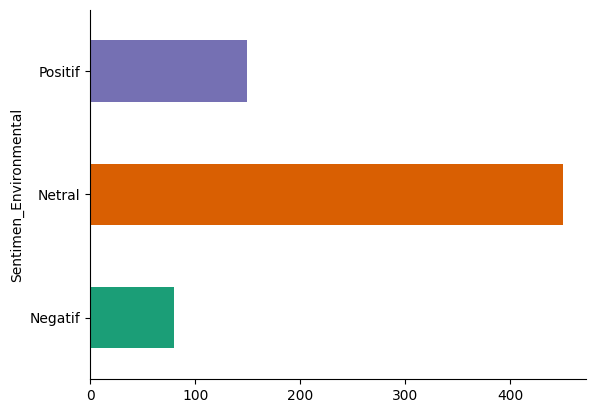

In [ ]:
# Sentimen_Environmental

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentimen_Environmental').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

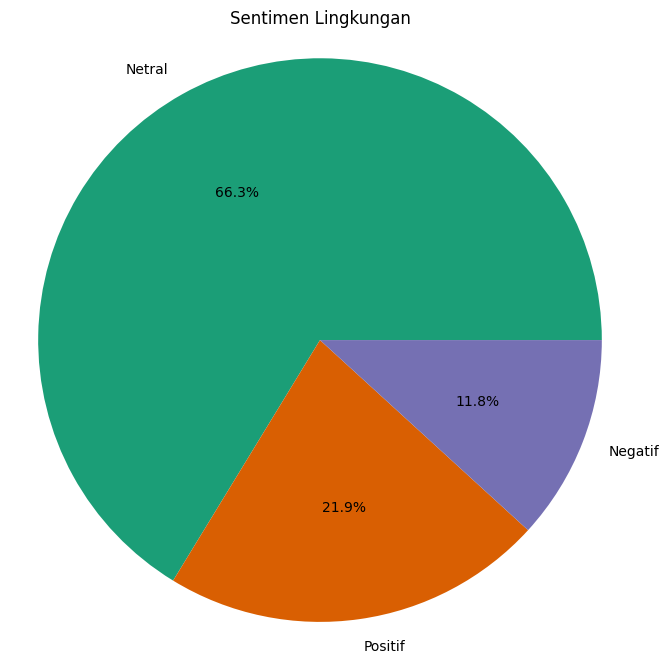

In [ ]:
# Import library yang diperlukan
import matplotlib.pyplot as plt

# Menghitung jumlah masing-masing sentimen lingkungan
sentimen_environmental_count = df['Sentimen_Environmental'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentimen_environmental_count, labels=sentimen_environmental_count.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'))
plt.title('Sentimen Lingkungan')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()


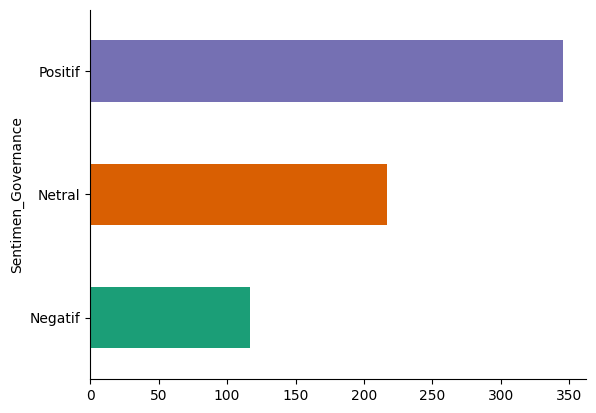

In [ ]:
# Sentimen_Governance

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentimen_Governance').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

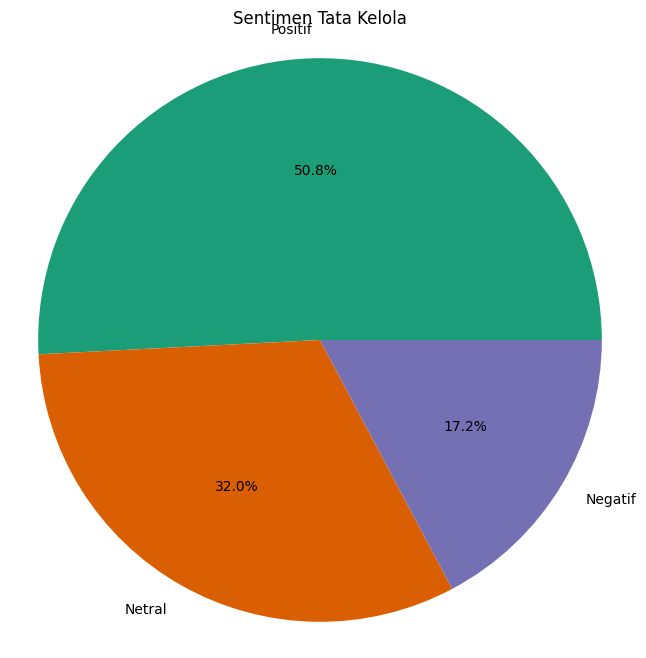

In [ ]:
# Import library yang diperlukan
import matplotlib.pyplot as plt

# Menghitung jumlah masing-masing sentimen tata kelola
sentimen_governance_count = df['Sentimen_Governance'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentimen_governance_count, labels=sentimen_governance_count.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'))
plt.title('Sentimen Tata Kelola')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()


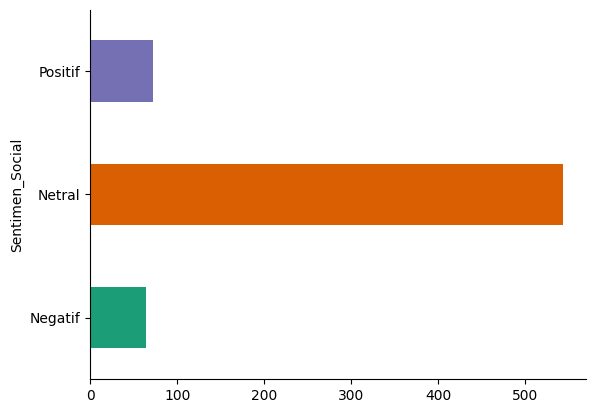

In [ ]:
# title Sentimen_Social

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentimen_Social').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

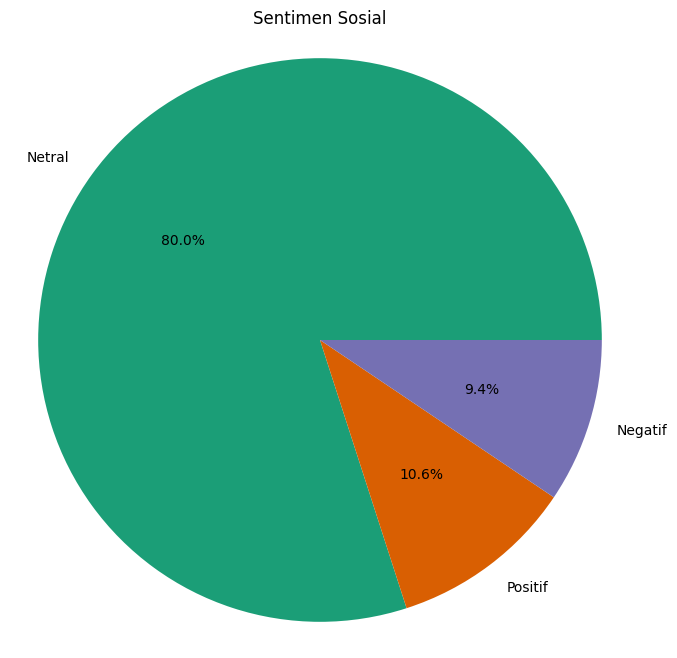

In [ ]:
# Menghitung jumlah masing-masing sentimen sosial
sentimen_social_count = df['Sentimen_Social'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentimen_social_count, labels=sentimen_social_count.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'))
plt.title('Sentimen Sosial')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()


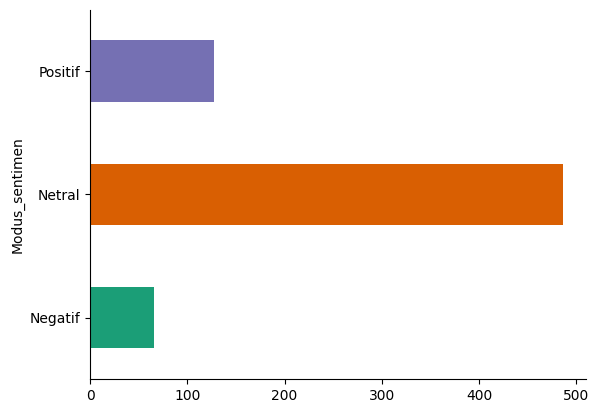

In [ ]:
# Summarize_sentimen

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Modus_sentimen').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

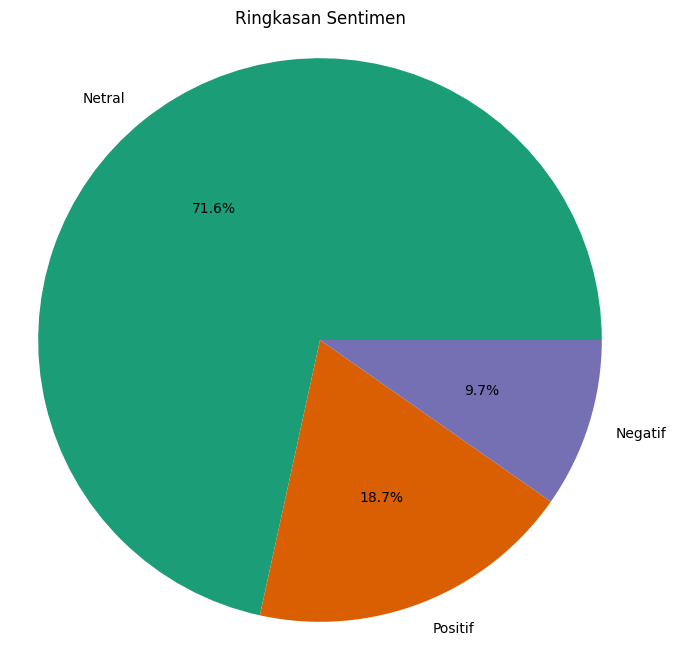

In [ ]:
# Import library yang diperlukan
import matplotlib.pyplot as plt

# Menghitung jumlah masing-masing nilai dalam kolom Summarize_sentimen
summarize_sentimen_count = df['Modus_sentimen'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(summarize_sentimen_count, labels=summarize_sentimen_count.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'))
plt.title('Ringkasan Sentimen')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()


# 5. Data Prepocesing Sentimen

In [ ]:
df.head()

,Text,Environmental Negative,Environmental Neutral,Environmental Positive,Governance Negative,Governance Neutral,Governance Positive,Social Negative,Social Neutral,Social Positive,__index_level_0__,Sentimen_Environmental,Sentimen_Governance,Sentimen_Social,Modus_sentimen,Summarize_Sentimen,Label
0,"Also, its U.S.-based plants have voluntarily p...",0,0,1,0,0,1,0,0,1,174,Positif,Positif,Positif,Positif,"Sentimen_Environmental: Positif,Sentimen_Gover...",1
1,Investors are concerned that Chevron has not a...,1,0,0,1,0,0,0,0,0,460,Negatif,Negatif,Netral,Negatif,"Sentimen_Environmental: Negatif,Sentimen_Gover...",-1
2,The Board should summarize its findings to sha...,0,0,0,0,1,0,0,0,0,356,Netral,Netral,Netral,Netral,"Sentimen_Environmental: Netral,Sentimen_Govern...",0
3,These Committees regularly assess risks and op...,0,0,0,0,0,1,0,0,0,80,Netral,Positif,Netral,Netral,"Sentimen_Environmental: Netral,Sentimen_Govern...",0
4,"Historically, releases from CPChem’s petrochem...",1,0,0,1,0,0,0,0,0,154,Negatif,Negatif,Netral,Negatif,"Sentimen_Environmental: Negatif,Sentimen_Gover...",-1


In [ ]:
columns_to_drop = [
    'Environmental Negative', 'Environmental Neutral', 'Environmental Positive',
    'Governance Negative', 'Governance Neutral', 'Governance Positive',
    'Social Negative', 'Social Neutral', 'Social Positive',
    '__index_level_0__', 'Sentimen_Environmental', 'Sentimen_Governance',
    'Sentimen_Social', 'Summarize_Sentimen', 'Label'
]

df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
category = pd.get_dummies(df.Modus_sentimen)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Modus_sentimen')
df_baru

,Text,Negatif,Netral,Positif
0,"Also, its U.S.-based plants have voluntarily p...",False,False,True
1,Investors are concerned that Chevron has not a...,True,False,False
2,The Board should summarize its findings to sha...,False,True,False
3,These Committees regularly assess risks and op...,False,True,False
4,"Historically, releases from CPChem’s petrochem...",True,False,False
...,...,...,...,...
674,This policy would phase in for the next CEO tr...,False,True,False
675,The policies of the energy industry are crucia...,False,True,False
676,"In addition, inadequate board attention could ...",True,False,False
677,Your Board recommends a vote AGAINST this prop...,False,True,False


In [ ]:
content = df_baru['Text'].values
label = df_baru[['Negatif',	'Netral',	'Positif']].values

In [ ]:
from sklearn.model_selection import train_test_split
content_latih, content_test, label_latih, label_test = train_test_split(content, label, test_size=0.2)

In [ ]:
pip install nltk


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Fungsi Penghilang Stopwords dan Tanda Baca
def preprocess_text(sentence):
    stop_words = set(stopwords.words('english'))

    tokenizer = RegexpTokenizer(r"\w+")
    word_tokens = tokenizer.tokenize(sentence)

    # Stemming using SnowballStemmer (NLTK) for English
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word.lower()) for word in word_tokens if word.lower() not in stop_words]

    return ' '.join(words)

# Menghilangkan stopwords dan tanda baca dari setiap kalimat dalam dataset
content_latih = [preprocess_text(sentence) for sentence in content_latih]
content_test = [preprocess_text(sentence) for sentence in content_test]

print("Setelah menghilangkan stopwords dan tanda baca:")
print("Content Latih:", content_latih[:5])
print("Content Test:", content_test[:5])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Setelah menghilangkan stopwords dan tanda baca:
Content Latih: ['howev chevron yet fulli report risk either public file statement sharehold', 'board summar find sharehold januari 31 2022 report complet reason cost omit proprietari inform', 'major oil compani face unpreced disrupt busi driven global imper limit global warm competit non carbon emit technolog', 'like environment justic communiti burden cumul impact pollut 15 resid richmond live poverti 80 peopl color', 'oper becom inund pose signific chemic releas risk extrem weather event']
Content Test: ['march 4 2014 rule held ecuadorian judgment unenforc unit state plaintiff counsel liabl racket rico statut u district court southern district new york sdni found plaintiff team wrote ecuadorian court judgment promis 500 000 ecuadorian judg rule favor sign judgment', '2019 compani updat human right polici clear state continu support intern human right includ commit respect principl set unit nation univers declar human right intern labor 

In [ ]:
# Fungsi Penghilang Blank
def remove_blank(text):
    text_data = text.replace("\n", "").replace("\t", "")
    return text_data

# Menghilangkan blank dari setiap kalimat dalam dataset
content_latih = [remove_blank(sentence) for sentence in content_latih]
content_test = [remove_blank(sentence) for sentence in content_test]

print("\nSetelah menghilangkan blank:")
print("Content Latih:", content_latih[:5])
print("Content Test:", content_test[:5])



Setelah menghilangkan blank:
Content Latih: ['howev chevron yet fulli report risk either public file statement sharehold', 'board summar find sharehold januari 31 2022 report complet reason cost omit proprietari inform', 'major oil compani face unpreced disrupt busi driven global imper limit global warm competit non carbon emit technolog', 'like environment justic communiti burden cumul impact pollut 15 resid richmond live poverti 80 peopl color', 'oper becom inund pose signific chemic releas risk extrem weather event']
Content Test: ['march 4 2014 rule held ecuadorian judgment unenforc unit state plaintiff counsel liabl racket rico statut u district court southern district new york sdni found plaintiff team wrote ecuadorian court judgment promis 500 000 ecuadorian judg rule favor sign judgment', '2019 compani updat human right polici clear state continu support intern human right includ commit respect principl set unit nation univers declar human right intern labor organ declar funda

In [ ]:
# Fungsi Ekspansi Teks (asumsikan ada fungsi `fix`)
def expanding_text(text):
    text_data = fix(text)  # Pastikan ada fungsi fix atau sesuaikan dengan kebutuhan
    return text_data

# Proses ekspansi teks
content_latih = [expanding_text(sentence) for sentence in content_latih]
content_test = [expanding_text(sentence) for sentence in content_test]

print("\nSetelah proses ekspansi teks:")
print("Content Latih:", content_latih[:5])
print("Content Test:", content_test[:5])



Setelah proses ekspansi teks:
Content Latih: ['howev chevron yet fulli report risk either public file statement sharehold', 'board summar find sharehold januari 31 2022 report complet reason cost omit proprietari inform', 'major oil compani face unpreced disrupt busi driven global imper limit global warm competit non carbon emit technolog', 'like environment justic communiti burden cumul impact pollut 15 resid richmond live poverti 80 peopl color', 'oper becom inund pose signific chemic releas risk extrem weather event']
Content Test: ['march 4 2014 rule held ecuadorian judgment unenforc unit state plaintiff counsel liabl racket rico statut you district court southern district new york sdni found plaintiff team wrote ecuadorian court judgment promis 500 000 ecuadorian judg rule favor sign judgment', '2019 compani updat human right polici clear state continu support intern human right includ commit respect principl set unit nation univers declar human right intern labor organ declar fu

In [ ]:
# Fungsi untuk menangani karakter aksen
def handle_accented_chr(text):
    text_data = unidecode(text)
    return text_data

# Menangani karakter aksen
content_latih = [handle_accented_chr(sentence) for sentence in content_latih]
content_test = [handle_accented_chr(sentence) for sentence in content_test]

print("\nSetelah menangani karakter aksen:")
print("Content Latih:", content_latih[:5])
print("Content Test:", content_test[:5])



Setelah menangani karakter aksen:
Content Latih: ['howev chevron yet fulli report risk either public file statement sharehold', 'board summar find sharehold januari 31 2022 report complet reason cost omit proprietari inform', 'major oil compani face unpreced disrupt busi driven global imper limit global warm competit non carbon emit technolog', 'like environment justic communiti burden cumul impact pollut 15 resid richmond live poverti 80 peopl color', 'oper becom inund pose signific chemic releas risk extrem weather event']
Content Test: ['march 4 2014 rule held ecuadorian judgment unenforc unit state plaintiff counsel liabl racket rico statut you district court southern district new york sdni found plaintiff team wrote ecuadorian court judgment promis 500 000 ecuadorian judg rule favor sign judgment', '2019 compani updat human right polici clear state continu support intern human right includ commit respect principl set unit nation univers declar human right intern labor organ decla

In [ ]:
# Fungsi Pembersihan Teks
def clean_text(text):
    text_data = text.lower()
    tokens = word_tokenize(text_data)
    clean_data = [i for i in tokens if i not in punctuation]
    clean_data = [i for i in clean_data if i.isalpha()]
    clean_data = [i for i in clean_data if len(i) > 1]
    return clean_data

# Membersihkan teks
content_latih_cleaned = [clean_text(sentence) for sentence in content_latih]
content_test_cleaned = [clean_text(sentence) for sentence in content_test]

print("\nSetelah membersihkan teks:")
print("Content Latih Cleaned:", content_latih_cleaned[:5])
print("Content Test Cleaned:", content_test_cleaned[:5])



Setelah membersihkan teks:
Content Latih Cleaned: [['howev', 'chevron', 'yet', 'fulli', 'report', 'risk', 'either', 'public', 'file', 'statement', 'sharehold'], ['board', 'summar', 'find', 'sharehold', 'januari', 'report', 'complet', 'reason', 'cost', 'omit', 'proprietari', 'inform'], ['major', 'oil', 'compani', 'face', 'unpreced', 'disrupt', 'busi', 'driven', 'global', 'imper', 'limit', 'global', 'warm', 'competit', 'non', 'carbon', 'emit', 'technolog'], ['like', 'environment', 'justic', 'communiti', 'burden', 'cumul', 'impact', 'pollut', 'resid', 'richmond', 'live', 'poverti', 'peopl', 'color'], ['oper', 'becom', 'inund', 'pose', 'signific', 'chemic', 'releas', 'risk', 'extrem', 'weather', 'event']]
Content Test Cleaned: [['march', 'rule', 'held', 'ecuadorian', 'judgment', 'unenforc', 'unit', 'state', 'plaintiff', 'counsel', 'liabl', 'racket', 'rico', 'statut', 'you', 'district', 'court', 'southern', 'district', 'new', 'york', 'sdni', 'found', 'plaintiff', 'team', 'wrote', 'ecuadori

In [ ]:
# Fungsi Lematisasi
def lemmatization(text_list):
    final_list = []
    lemmatizer = WordNetLemmatizer()
    for i in text_list:
        w = lemmatizer.lemmatize(i)
        final_list.append(w)
    return " ".join(final_list)

# Lematisasi
content_latih_lemmatized = [lemmatization(sentence) for sentence in content_latih_cleaned]
content_test_lemmatized = [lemmatization(sentence) for sentence in content_test_cleaned]

print("\nSetelah lematisasi:")
print("Content Latih Lemmatized:", content_latih_lemmatized[:5])
print("Content Test Lemmatized:", content_test_lemmatized[:5])



Setelah lematisasi:
Content Latih Lemmatized: ['howev chevron yet fulli report risk either public file statement sharehold', 'board summar find sharehold januari report complet reason cost omit proprietari inform', 'major oil compani face unpreced disrupt busi driven global imper limit global warm competit non carbon emit technolog', 'like environment justic communiti burden cumul impact pollut resid richmond live poverti peopl color', 'oper becom inund pose signific chemic releas risk extrem weather event']
Content Test Lemmatized: ['march rule held ecuadorian judgment unenforc unit state plaintiff counsel liabl racket rico statut you district court southern district new york sdni found plaintiff team wrote ecuadorian court judgment promis ecuadorian judg rule favor sign judgment', 'compani updat human right polici clear state continu support intern human right includ commit respect principl set unit nation univers declar human right intern labor organ declar fundament principl right

In [ ]:
df.head()

,Text,Modus_sentimen
0,"Also, its U.S.-based plants have voluntarily p...",Positif
1,Investors are concerned that Chevron has not a...,Negatif
2,The Board should summarize its findings to sha...,Netral
3,These Committees regularly assess risks and op...,Netral
4,"Historically, releases from CPChem’s petrochem...",Negatif


In [ ]:
# Simpan DataFrame ke file CSV
df.to_csv('data_clean.csv', index=False)

# Train test split

In [ ]:
df.head(5)

,Text,Modus_sentimen
0,"Also, its U.S.-based plants have voluntarily p...",Positif
1,Investors are concerned that Chevron has not a...,Negatif
2,The Board should summarize its findings to sha...,Netral
3,These Committees regularly assess risks and op...,Netral
4,"Historically, releases from CPChem’s petrochem...",Negatif


In [ ]:
#store classes into an array
possible_labels = df['Modus_sentimen'].unique()
possible_labels

array(['Positif', 'Negatif', 'Netral'], dtype=object)

In [ ]:
#convert labels into numeric values
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [ ]:
label_dict

{'Positif': 0, 'Negatif': 1, 'Netral': 2}

In [ ]:
#convert labels into numeric values
df['label'] = df['Modus_sentimen'].replace(label_dict)
df.head(10)

,Text,Modus_sentimen,label
0,"Also, its U.S.-based plants have voluntarily p...",Positif,0
1,Investors are concerned that Chevron has not a...,Negatif,1
2,The Board should summarize its findings to sha...,Netral,2
3,These Committees regularly assess risks and op...,Netral,2
4,"Historically, releases from CPChem’s petrochem...",Negatif,1
5,"The U.S. joined the Global Methane Pledge, com...",Positif,0
6,Your Board recommends a vote AGAINST this prop...,Netral,2
7,"However, Chevron has yet to fully report these...",Netral,2
8,"In a March 4, 2014, ruling that held that the ...",Netral,2
9,While the ultimate responsibility for climate ...,Positif,0


In [ ]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values,
                                                   df.Modus_sentimen.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.Modus_sentimen.values)

In [ ]:
#create new column
df['data_type'] = ['not_set'] * df.shape[0]
df.head()

,Text,Modus_sentimen,label,data_type
0,"Also, its U.S.-based plants have voluntarily p...",Positif,0,not_set
1,Investors are concerned that Chevron has not a...,Negatif,1,not_set
2,The Board should summarize its findings to sha...,Netral,2,not_set
3,These Committees regularly assess risks and op...,Netral,2,not_set
4,"Historically, releases from CPChem’s petrochem...",Negatif,1,not_set


In [ ]:
#fill in data type
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [ ]:
df.groupby(['Text', 'label', 'data_type']).count()

Modus_sentimen
Text                                               label data_type                
1. Company policy and procedures governing lobb... 2     train                   1
                                                         val                     1
1. Supporting a price on carbon through well-de... 0     train                   1
2. Payments by Chevron used for (a) direct or i... 2     train                   1
                                                         val                     1
...                                                                            ...
more than 70% of listed companies, representing... 2     train                   1
peers (Shell, bp, TotalEnergies) have released ... 2     train                   1
provide investors with insight as to whether th... 2     train                   1
“Climate change poses a major risk to the stabi... 2     val                     1
“Indirect lobbying” is lobbying engaged in by a... 2     train                   1

[630 rows x 1 columns]

In [ ]:
#libraries and packages
!pip install torch
import torch
import pandas as pd
from tqdm.notebook import tqdm

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!pip install transformers

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [ ]:
#load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
#tokenize train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].Text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 150,
                                                return_tensors = 'pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
#tokenizer val set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].Text.values,
                                                #add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 150,
                                                return_tensors = 'pt')

In [ ]:
encoded_data_train

{'input_ids': tensor([[ 101, 9387, 2024,  ...,    0,    0,    0],
        [ 101, 1996, 2604,  ...,    0,    0,    0],
        [ 101, 2122, 9528,  ...,    0,    0,    0],
        ...,
        [ 101, 2023, 6378,  ...,    0,    0,    0],
        [ 101, 1996, 6043,  ...,    0,    0,    0],
        [ 101, 1999, 2804,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

# encoding

In [ ]:
#encode train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label.values)

In [ ]:
#encode val set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(df[df.data_type == 'val'].label.values)

In [ ]:
input_ids_train

tensor([[ 101, 9387, 2024,  ...,    0,    0,    0],
        [ 101, 1996, 2604,  ...,    0,    0,    0],
        [ 101, 2122, 9528,  ...,    0,    0,    0],
        ...,
        [ 101, 2023, 6378,  ...,    0,    0,    0],
        [ 101, 1996, 6043,  ...,    0,    0,    0],
        [ 101, 1999, 2804,  ...,    0,    0,    0]])

In [ ]:
attention_masks_train

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [ ]:
labels_train

tensor([1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
        2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2,
        0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2,
        1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
        1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
        1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1,
        2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0,
        2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2,
        0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,

In [ ]:
#create dataloader
dataset_train = TensorDataset(input_ids_train,
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val,
                             attention_masks_val,
                             labels_val)

In [ ]:
print(len(dataset_train))
print(len(dataset_val))

577
102


In [ ]:
dataset_train

In [ ]:
dataset_train.tensors

(tensor([[ 101, 9387, 2024,  ...,    0,    0,    0],
         [ 101, 1996, 2604,  ...,    0,    0,    0],
         [ 101, 2122, 9528,  ...,    0,    0,    0],
         ...,
         [ 101, 2023, 6378,  ...,    0,    0,    0],
         [ 101, 1996, 6043,  ...,    0,    0,    0],
         [ 101, 1999, 2804,  ...,    0,    0,    0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
         2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2,
         0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2,
         1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
         1, 0, 2, 2, 2, 2, 2, 0, 2,

# Set Up BERT Pretrained Model

In [ ]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#model summary
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

# Create Data Loaders

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 16) #since we don't have to do backpropagation for this step


# Set Up Optimizer and Scheduler

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

#load optimizer
optimizer = AdamW(model.parameters(),
                 lr = 2e-5,
                 eps = 1e-8) #2e-5 > 5e-5

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 500,
                                           num_training_steps = len(dataloader_train)*epochs)

# Define Performance Metrics

In [ ]:
#preds = [0.9 0.05 0.05 0 0 0]
#preds = [1 0 0 0 0 0]

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

In [ ]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer
    model.eval()

    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in tqdm(dataloader_val):

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        #compute logits
        with torch.no_grad():
            outputs = model(**inputs)

        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

# Train Model

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [ ]:
for epoch in tqdm(range(1, epochs+1)):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0

    #set up progress bar
    progress_bar = tqdm(dataloader_train,
                        desc='Epoch {:1d}'.format(epoch),
                        leave=False,
                        disable=False)

    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()

        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})

    tqdm.write('\nEpoch {epoch}')

    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/145 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.8912161958628687


  0%|          | 0/7 [00:00<?, ?it/s]

Validation loss: 0.728336785520826
F1 Score (weighted): 0.5970868347338935


Epoch 2:   0%|          | 0/145 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.697390330968232


  0%|          | 0/7 [00:00<?, ?it/s]

Validation loss: 0.581244809286935
F1 Score (weighted): 0.7182303301067262


Epoch 3:   0%|          | 0/145 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.5673714766728467


  0%|          | 0/7 [00:00<?, ?it/s]

Validation loss: 0.9438134474413735
F1 Score (weighted): 0.6583032790283132


Epoch 4:   0%|          | 0/145 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.3736856203333571


  0%|          | 0/7 [00:00<?, ?it/s]

Validation loss: 0.6113317204373223
F1 Score (weighted): 0.8248702775387621


Epoch 5:   0%|          | 0/145 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.16817242854820758


  0%|          | 0/7 [00:00<?, ?it/s]

Validation loss: 1.1544142748628343
F1 Score (weighted): 0.777589158673357


Epoch 6:   0%|          | 0/145 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.10698368675998765


  0%|          | 0/7 [00:00<?, ?it/s]

Validation loss: 1.2410687463624137
F1 Score (weighted): 0.80463791796912


Epoch 7:   0%|          | 0/145 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.05749877160535483


  0%|          | 0/7 [00:00<?, ?it/s]

Validation loss: 0.8711207939444908
F1 Score (weighted): 0.8306859261667557


Epoch 8:   0%|          | 0/145 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.036919784917624605


  0%|          | 0/7 [00:00<?, ?it/s]

Validation loss: 0.9834225589542517
F1 Score (weighted): 0.8053715967623253


Epoch 9:   0%|          | 0/145 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.03482519869335349


  0%|          | 0/7 [00:00<?, ?it/s]

Validation loss: 1.0313019582203455
F1 Score (weighted): 0.7924553423274651


Epoch 10:   0%|          | 0/145 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.026719838061072896


  0%|          | 0/7 [00:00<?, ?it/s]

Validation loss: 0.9960690947981286
F1 Score (weighted): 0.791328088184072


# Model Evaluation

In [ ]:
outputs.loss

tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
outputs.logits

tensor([[ 5.1786, -2.5711, -2.5174]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
#save model
model.to(device)
pass

In [ ]:
#evaluate
_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
#get accuracy score
accuracy_per_class(predictions, true_vals)

Class: Positif
Accuracy:15/19

Class: Negatif
Accuracy:4/10

Class: Netral
Accuracy:62/73



In [ ]:
import torch
from sklearn.metrics import accuracy_score, classification_report

# Function to evaluate model performance
def evaluate(dataloader):
    model.eval()
    predictions, true_labels = [], []

    for batch in dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        predictions.append(logits)
        true_labels.append(label_ids)

    # Flatten the predictions and true labels
    predictions = [item for sublist in predictions for item in sublist]
    true_labels = [item for sublist in true_labels for item in sublist]

    # Get the predicted labels by choosing the class with the highest logit value
    predicted_labels = [list(pred).index(max(pred)) for pred in predictions]

    return predicted_labels, true_labels

# Function to print accuracy and classification report
def print_evaluation_metrics(predictions, true_vals):
    accuracy = accuracy_score(true_vals, predictions)
    report = classification_report(true_vals, predictions, digits=6)

    print(f'Accuracy: {accuracy:.6f}')
    print('Classification Report:')
    print(report)

# Assume dataloader_val is your validation DataLoader
predictions, true_vals = evaluate(dataloader_val)

# Print evaluation metrics
print_evaluation_metrics(predictions, true_vals)


Accuracy: 0.794118
Classification Report:
              precision    recall  f1-score   support

           0   0.600000  0.789474  0.681818        19
           1   0.800000  0.400000  0.533333        10
           2   0.861111  0.849315  0.855172        73

    accuracy                       0.794118       102
   macro avg   0.753704  0.679596  0.690108       102
weighted avg   0.806481  0.794118  0.791328       102



In [ ]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to predict sentiment of a given text
def predict_sentiment(text):
    # Let's assume 'model' is already defined and loaded
    model.eval()

    # Tokenize and encode the text
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True  # Explicitly activate truncation
    )

    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    # Perform prediction
    with torch.no_grad():
        outputs = model(input_ids, token_type_ids=None, attention_mask=attention_mask)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()

    # Get the predicted label
    predicted_label = list(logits[0]).index(max(logits[0]))

    return predicted_label

if __name__ == "__main__":
    # Define device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Get user input for sentiment text
    user_text = input("Masukkan teks sentimen: ")

    # Predict sentiment
    predicted_sentiment = predict_sentiment(user_text)

    # Map predicted label to sentiment description
    sentiment_mapping = {
        0: 'Positif',
        1: 'Negatif',
        2: 'Netral'
    }
    predicted_sentiment_description = sentiment_mapping[predicted_sentiment]

    # Create a DataFrame to display the results
    results_df = pd.DataFrame({
        'Teks Sentimen': [user_text],
        'Prediksi Sentimen': [predicted_sentiment_description]
    })

    print("\nHasil Prediksi Sentimen:")
    print(results_df.to_string(index=False))


Masukkan teks sentimen: Sentimen Summary

Hasil Prediksi Sentimen:
   Teks Sentimen Prediksi Sentimen
Sentimen Summary            Netral


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
import joblib

# Asumsikan model yang dilatih bernama 'model'
joblib.dump(model, 'sentiment_model.pkl')

['sentiment_model.pkl']

In [ ]:
!pip install streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.125.228.42


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd

# Memuat model yang telah dilatih
model = joblib.load('sentiment_model.pkl')

# Fungsi untuk prediksi sentimen
def predict_sentiment(text):
    # Langsung menggunakan model tanpa preprocessing tambahan
    result = model.predict([text])
    return result[0]  # Sesuaikan dengan format output model

# UI Streamlit
st.title("Dashboard Analisis Sentimen ESG")

# Input teks dari pengguna
user_input = st.text_area("Masukkan teks untuk analisis sentimen")

if user_input:
    # Melakukan analisis sentimen
    sentiment = predict_sentiment(user_input)
    # Menampilkan hasil analisis sentimen
    st.write(f"Sentimen: {sentiment}")

# File upload
uploaded_file = st.file_uploader("Upload file untuk analisis sentimen", type=["txt", "csv"])

if uploaded_file:
    if uploaded_file.type == "text/plain":
        # Membaca file teks
        text = uploaded_file.read().decode("utf-8")
        # Melakukan analisis sentimen pada teks
        sentiment = predict_sentiment(text)
        # Menampilkan hasil analisis sentimen
        st.write(f"Sentimen: {sentiment}")
    elif uploaded_file.type == "text/csv":
        # Membaca file CSV
        df = pd.read_csv(uploaded_file)
        # Memastikan kolom pertama adalah teks untuk analisis
        if df.shape[1] > 0:
            df['sentiment'] = df.iloc[:, 0].apply(lambda x: predict_sentiment(str(x)))
            st.write(df)
        else:
            st.error("File CSV tidak memiliki kolom yang sesuai untuk analisis sentimen.")

Writing app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.228.42:8501

npx: installed 22 in 3.105s
your url is: https://wet-buckets-lie.loca.lt
2024-05-31 15:54:30.906 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 600, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 22, in <module>
    sentiment = predict_sentiment(user_input)
  File "/content/app.py", line 11, in predict_sentiment
    result = model.predict([text])
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1709, in __getattr__
    raise AttributeError(f"'{type(self).__name__}' object has no attribute '{name}'")
AttributeError: 'BertForSequenceClassification' object has no attribute 'predict'
2024-05-31 16:01:23.150 Uncaught app exception
Traceback (m